In [29]:
import pandas as pd

# Memuat file CSV menggunakan raw string
file_path = r'C:\Users\desha\OneDrive\Documents\Tugas Kampus\AI\UAS\[Dataset]_(Viral_Konten_MedSos).csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print(data.head())

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

In [30]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(columns=['url', ' shares'])
y = data[' shares']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrame for compatibility with further steps
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-0.074929,2.167176,0.163991,-0.010739,-0.000485,-0.013126,0.274251,-0.600388,-0.427951,-0.301914,...,-0.742313,-0.871878,0.172098,0.002284,0.076074,0.077773,0.541512,0.983073,-1.591575,0.777279
1,1.687204,0.281576,-0.298438,-0.008224,-0.000485,-0.009729,-0.785151,-0.861837,-0.427951,-0.301914,...,-0.557002,0.586949,-1.036872,0.988459,1.223900,0.077773,-0.871396,-0.266541,0.838354,-0.689110
2,-0.430160,-1.604023,-0.433577,0.014573,-0.000485,0.024919,-0.520301,-0.338939,-0.427951,-0.301914,...,0.718803,-0.458901,-0.633882,-0.181514,-0.956971,0.600908,-0.871396,-0.266541,0.838354,-0.689110
3,-0.350701,0.281576,-0.703856,0.007169,-0.000485,0.022474,-0.255450,-0.338939,-0.187658,-0.301914,...,-0.266931,-0.871878,-1.036872,1.263655,1.367379,0.376707,0.824093,0.483227,-1.547395,0.190724
4,1.369366,1.224376,-0.902342,0.047734,-0.000485,0.053254,-0.696868,-0.861837,-0.427951,-0.301914,...,0.870030,1.487989,0.978078,-2.276581,-1.645667,0.077773,-0.871396,-0.266541,0.838354,-0.689110


In [27]:
# Display the column names
data.columns.tolist()

['url',
 ' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\desha\OneDrive\Documents\Tugas Kampus\AI\UAS\[Dataset]_(Viral_Konten_MedSos).csv'
data = pd.read_csv(file_path)

# Feature columns (excluding 'url' and 'shares')
features = data.drop(columns=['url', ' shares'])

# Target column
target = data[' shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optionally, inspect feature importances
importances = model.feature_importances_
feature_names = features.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importances)


Mean Squared Error: 127653811.15401052
R^2 Score: -0.05785920656273169
                           feature  importance
26                      kw_avg_avg    0.081948
25                      kw_max_avg    0.052770
2                 n_tokens_content    0.050918
29      self_reference_avg_sharess    0.045989
3                  n_unique_tokens    0.036235
0                        timedelta    0.036206
20                      kw_avg_min    0.033870
23                      kw_avg_max    0.032525
38                          LDA_00    0.028590
24                      kw_min_avg    0.028019
10            average_token_length    0.026900
41                          LDA_03    0.026846
55              title_subjectivity    0.025050
40                          LDA_02    0.023933
6                        num_hrefs    0.023586
39                          LDA_01    0.022956
42                          LDA_04    0.022241
5         n_non_stop_unique_tokens    0.021836
43             global_subjectivity  

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
Mean Squared Error: 117482657.59
R2 Score: 0.03


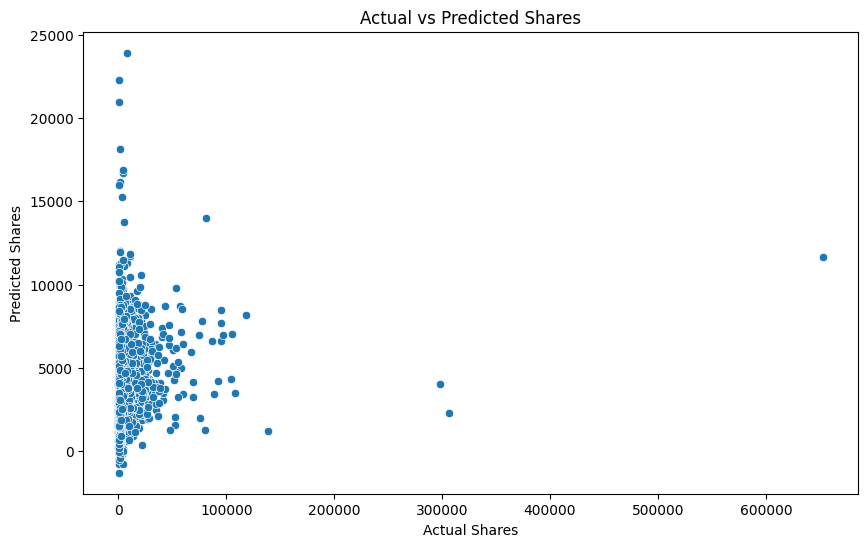

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r'C:\Users\desha\OneDrive\Documents\Tugas Kampus\AI\UAS\[Dataset]_(Viral_Konten_MedSos).csv'
df = pd.read_csv(file_path)

# Data cleaning
# Check for missing values
print(df.isnull().sum())

# Drop any rows with missing values
df.dropna(inplace=True)

# Data normalization
scaler = StandardScaler()
df[['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
    'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
    'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 
    'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'elf_reference_min_shares', 'elf_reference_max_shares', 'elf_reference_avg_sharess', 
    'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 
    'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'in_positive_polarity', 'ax_positive_polarity', 
    'avg_negative_polarity', 'in_negative_polarity', 'ax_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 
    'abs_title_sentiment_polarity']] = scaler.fit_transform(df[[' timedelta', ' n_tokens_title', 
                                                                ' n_tokens_content', ' n_unique_tokens', 
                                                                ' n_non_stop_words', ' n_non_stop_unique_tokens', 
                                                                ' num_hrefs', ' num_self_hrefs', ' num_imgs', 
                                                                ' num_videos', ' average_token_length', 
                                                                ' num_keywords', ' kw_min_min', ' kw_max_min', 
                                                                ' kw_avg_min', ' kw_min_max', ' kw_max_max', 
                                                                ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', 
                                                                ' kw_avg_avg', ' self_reference_min_shares', 
                                                                ' self_reference_max_shares', 
                                                                ' self_reference_avg_sharess', 
                                                                ' global_subjectivity', 
                                                                ' global_sentiment_polarity', 
                                                                ' global_rate_positive_words', 
                                                                ' global_rate_negative_words', 
                                                                ' rate_positive_words', ' rate_negative_words', 
                                                                ' avg_positive_polarity', ' min_positive_polarity', 
                                                                ' max_positive_polarity', ' avg_negative_polarity', 
                                                                ' min_negative_polarity', ' max_negative_polarity', 
                                                                ' title_subjectivity', ' title_sentiment_polarity', 
                                                                ' abs_title_subjectivity', ' abs_title_sentiment_polarity']])

# Split the data into training and testing sets
X = df.drop([' shares', 'url'], axis=1)
y = df[' shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Actual vs Predicted Shares')
plt.show()

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

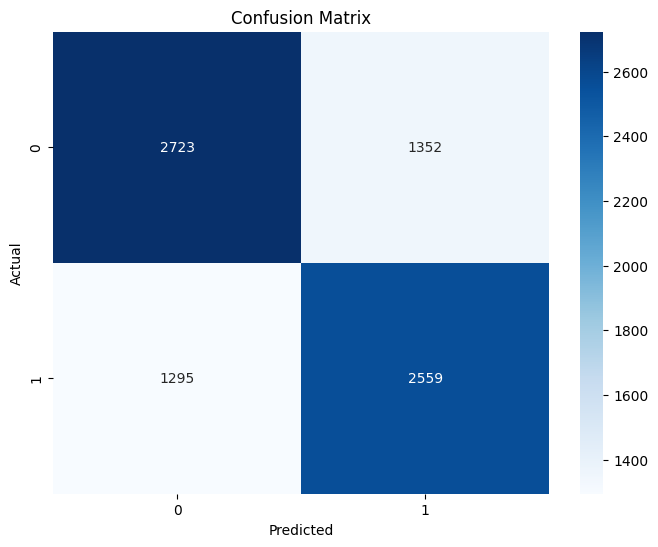

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
file_path = r'C:\Users\desha\OneDrive\Documents\Tugas Kampus\AI\UAS\[Dataset]_(Viral_Konten_MedSos).csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
print(data.head())

# Mengubah target menjadi kategori (misalnya, viral jika shares > 1400)
threshold = 1400
data['viral'] = np.where(data[' shares'] > threshold, 1, 0)

# Memisahkan fitur dan target
X = data.drop(columns=['url', ' shares', 'viral'])
y = data['viral']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Memprediksi pada set pengujian
y_pred = model.predict(X_test_scaled)

# Mengevaluasi performa model dengan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Memuat dataset
file_path = r'C:\Users\desha\OneDrive\Documents\Tugas Kampus\AI\UAS\[Dataset]_(Viral_Konten_MedSos).csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
# print(data.head())

# Mengubah target kontinyu menjadi kategori
# Misalnya, kita akan mengkategorikan 'shares' menjadi 3 kategori: tidak viral, lumayan viral, viral
def categorize_shares(shares):
    if shares < 1500:
        return 'Not Viral'
    elif shares < 3000:
        return 'Quite Viral'
    else:
        return 'Viral'

data['shares_category'] = data[' shares'].apply(categorize_shares)

# Memisahkan fitur dan target
X = data.drop(columns=['url', ' shares', 'shares_category'])
y = data['shares_category']

# Mengkodekan label target
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

# Memprediksi pada set pengujian
y_pred = model.predict(X_test_scaled)

# Mengevaluasi performa model dengan metrik klasifikasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(classification_report(y_test, y_pred, target_names=labelencoder.classes_))

# Melakukan tuning hyperparameter (opsional)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)


Accuracy: 0.56
Precision: 0.51
Recall: 0.56
              precision    recall  f1-score   support

   Not Viral       0.58      0.92      0.71      4075
 Quite Viral       0.40      0.07      0.12      1986
       Viral       0.49      0.29      0.37      1868

    accuracy                           0.56      7929
   macro avg       0.49      0.43      0.40      7929
weighted avg       0.51      0.56      0.48      7929

{'max_depth': 30, 'n_estimators': 300}
